# spaCy 

## Industrial-Strength Natural Language Processing

### Gabor Kovacs | CAP 6640 | 3/1/2021

https://spacy.io/

In [1]:
import spacy

## Pre-trained Models

There are many pre-trained models available: https://spacy.io/models

en_core_web_sm is a small English model that is trained on web text

English pipeline optimized for CPU. Components: tok2vec, tagger, parser, senter, ner, attribute_ruler, lemmatizer.

The _sm refers to small

Download the Model
```sh
-m spacy download en_core_web_sm
```

In [1]:
nlp = spacy.load("en_core_web_sm")

NameError: name 'spacy' is not defined

## Create a Document using the nlp() method

In [3]:
doc = nlp("My name is Gabor Kovacs. I have lived in Florida for 16 years and I like Programming.")

## The object returned is a spacy.tokens.doc.Doc

In [4]:
type(doc)

spacy.tokens.doc.Doc

## The Document consists of tokens

In [5]:
[token for token in doc]

[My,
 name,
 is,
 Gabor,
 Kovacs,
 .,
 I,
 have,
 lived,
 in,
 Florida,
 for,
 16,
 years,
 and,
 I,
 like,
 Programming,
 .]

## Print token attribues

### Alpha, Numeric, Punctuated

In [6]:
[token.text + "   Alpha: " + str(token.is_alpha) + 
              "   Numeric: " + str(token.like_num) +
              "   Punctuated: " + str(token.is_punct)
 for token in doc]

['My   Alpha: True   Numeric: False   Punctuated: False',
 'name   Alpha: True   Numeric: False   Punctuated: False',
 'is   Alpha: True   Numeric: False   Punctuated: False',
 'Gabor   Alpha: True   Numeric: False   Punctuated: False',
 'Kovacs   Alpha: True   Numeric: False   Punctuated: False',
 '.   Alpha: False   Numeric: False   Punctuated: True',
 'I   Alpha: True   Numeric: False   Punctuated: False',
 'have   Alpha: True   Numeric: False   Punctuated: False',
 'lived   Alpha: True   Numeric: False   Punctuated: False',
 'in   Alpha: True   Numeric: False   Punctuated: False',
 'Florida   Alpha: True   Numeric: False   Punctuated: False',
 'for   Alpha: True   Numeric: False   Punctuated: False',
 '16   Alpha: False   Numeric: True   Punctuated: False',
 'years   Alpha: True   Numeric: False   Punctuated: False',
 'and   Alpha: True   Numeric: False   Punctuated: False',
 'I   Alpha: True   Numeric: False   Punctuated: False',
 'like   Alpha: True   Numeric: False   Punctuated:

### Lemmanization
(Finding root lexical components)

In [7]:
[token.text + ": " + token.lemma_ for token in doc]

['My: my',
 'name: name',
 'is: be',
 'Gabor: Gabor',
 'Kovacs: Kovacs',
 '.: .',
 'I: I',
 'have: have',
 'lived: live',
 'in: in',
 'Florida: Florida',
 'for: for',
 '16: 16',
 'years: year',
 'and: and',
 'I: I',
 'like: like',
 'Programming: programming',
 '.: .']

### Stop Words
(Commonly used words that are often excluded from searches)

In [8]:
[token.text + ": " + str(token.is_stop) for token in doc]

['My: True',
 'name: True',
 'is: True',
 'Gabor: False',
 'Kovacs: False',
 '.: False',
 'I: True',
 'have: True',
 'lived: False',
 'in: True',
 'Florida: False',
 'for: True',
 '16: False',
 'years: False',
 'and: True',
 'I: True',
 'like: False',
 'Programming: False',
 '.: False']

### Shape

In [9]:
[token.text + ": " + token.shape_ for token in doc]

['My: Xx',
 'name: xxxx',
 'is: xx',
 'Gabor: Xxxxx',
 'Kovacs: Xxxxx',
 '.: .',
 'I: X',
 'have: xxxx',
 'lived: xxxx',
 'in: xx',
 'Florida: Xxxxx',
 'for: xxx',
 '16: dd',
 'years: xxxx',
 'and: xxx',
 'I: X',
 'like: xxxx',
 'Programming: Xxxxx',
 '.: .']

### Parts of Speech 

In [10]:
[token.text + " : " + token.pos_ for token in doc]

['My : PRON',
 'name : NOUN',
 'is : AUX',
 'Gabor : PROPN',
 'Kovacs : PROPN',
 '. : PUNCT',
 'I : PRON',
 'have : AUX',
 'lived : VERB',
 'in : ADP',
 'Florida : PROPN',
 'for : ADP',
 '16 : NUM',
 'years : NOUN',
 'and : CCONJ',
 'I : PRON',
 'like : VERB',
 'Programming : NOUN',
 '. : PUNCT']

### Print Explanations

In [11]:
print('PRON:', spacy.explain('PRON'))
print('AUX:', spacy.explain('AUX'))
print('CCONJ:', spacy.explain('CCONJ'))

PRON: pronoun
AUX: auxiliary
CCONJ: coordinating conjunction


### Tagging
A more detailed part-of-speech

In [12]:
[token.text + " : " + token.tag_ for token in doc]

['My : PRP$',
 'name : NN',
 'is : VBZ',
 'Gabor : NNP',
 'Kovacs : NNP',
 '. : .',
 'I : PRP',
 'have : VBP',
 'lived : VBN',
 'in : IN',
 'Florida : NNP',
 'for : IN',
 '16 : CD',
 'years : NNS',
 'and : CC',
 'I : PRP',
 'like : VBP',
 'Programming : NN',
 '. : .']

In [13]:
print('PRP$:', spacy.explain('PRP$'))
print('NN:', spacy.explain('NN'))

PRP$: pronoun, possessive
NN: noun, singular or mass


### Dependency
Shows the relation between tokens.

In [14]:
[token.text + ": " + token.dep_ for token in doc]

['My: poss',
 'name: nsubj',
 'is: ROOT',
 'Gabor: compound',
 'Kovacs: attr',
 '.: punct',
 'I: nsubj',
 'have: aux',
 'lived: ROOT',
 'in: prep',
 'Florida: pobj',
 'for: prep',
 '16: nummod',
 'years: pobj',
 'and: cc',
 'I: nsubj',
 'like: conj',
 'Programming: pobj',
 '.: punct']

In [15]:
print('poss:', spacy.explain('poss'))
print('nsubj:', spacy.explain('nsubj'))
print('pobj:', spacy.explain('pobj'))

poss: possession modifier
nsubj: nominal subject
pobj: object of preposition


## How are words in a sentence related?
We can use pos, dep, and head.text to see how words are related.
token.head.text returns the syntactic head token aka the parent token that this word is attached to

## displacy

In [16]:
from spacy import displacy

In [17]:
displacy.render(doc)

In [ ]:
print('dobj:', spacy.explain('dobj'))
print('nsubj:', spacy.explain('nsubj'))

## Predicted Named Entities
Used to Identify Actors and Actions

In [18]:
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

In [19]:
for ent in doc.ents:
    print(ent.text, ent.label_)    

Apple ORG
U.K. GPE
$1 billion MONEY


In [20]:
print('GPE:', spacy.explain('GPE'))

GPE: Countries, cities, states


## Rule-based Matching

In [21]:
from spacy.matcher import Matcher

In [22]:
def find_matches(doc, pattern):
    
    matcher = Matcher(nlp.vocab)
    matcher.add("pattern", [pattern])
    matches = matcher(doc)
    
    for match_id, start, end in matches:
        
        matched_span = doc[start:end]
                            
        print("Matched Span: ", matched_span.text)

## Find two tokens: A verb with the lemma 'love' followed by a noun

In [23]:
doc = nlp("I loved dogs but now I love cats more.")

pattern = [
    {"LEMMA": "love", "POS": "VERB"},
    {"POS": "NOUN"}
]

find_matches(doc, pattern)

Matched Span:  loved dogs
Matched Span:  love cats


## Use operators to define how often a token should be matched

Use the OP key - which can have 4 values ! ? + *

- {"OP": "!"} Match 0 times
- {"OP": "?"} Match 0 or 1 times
- {"OP": "+"} Match 1 or more times
- {"OP": "*"} Match 0 or more times

The '?' makes the Determiner token optional

So the following will match a token with 

    1. a lemma 'buy' 
    2. an option article 
    3. a noun


In [24]:
doc = nlp("I bought a smartphone. Now I am buying apps.")

pattern = [
    {"LEMMA": "buy"}, 
    {"POS": "DET", "OP": "?"}, # optional: match 0 or 1 times
    {"POS": "NOUN"}
]

find_matches(doc, pattern)

Matched Span:  bought a smartphone
Matched Span:  buying apps


In [25]:
doc = nlp("2018 FIFA World Cup: France won!")

pattern = [
    {"IS_DIGIT": True},
    {"LOWER": "fifa"},
    {"LOWER": "world"},
    {"LOWER": "cup"},
    {"IS_PUNCT": True}
]

find_matches(doc, pattern)

Matched Span:  2018 FIFA World Cup:


## Similarity

In [26]:
# Requires a more complete model; load en_core_web_md
nlp = spacy.load("en_core_web_md")

In [27]:
doc1 = nlp("I feel like fast food")
doc2 = nlp("I feel like pizza")

In [28]:
print (doc1.similarity(doc2))

0.9152738662282996


In [29]:
token1 = doc1[4]
token2 = doc2[3]

print(token1,token2)

food pizza


In [30]:
print (token1.similarity(token2))

0.59247416


### Be careful

In [31]:
doc1 = nlp("I like python")
doc2 = nlp("I hate python")
print (doc1.similarity(doc2))

0.9447121259225059


## PhraseMatcher - Like matcher, but better/faster

Designed for larger documents

In [ ]:
from spacy.matcher import PhraseMatcher

matcher = PhraseMatcher(nlp.vocab)

# A Doc is passed in as the pattern
pattern = nlp("Golden Retriever")

matcher.add("DOG", [pattern])

doc = nlp("I have a Golden Retriever")

for match_id, start, end in matcher(doc):
    span = doc[start:end]
    print("Matched span:", span.text)

## Pipelines

- Add our own functions to the spacy pipeline
- This is executed when we call the nlp object on the text

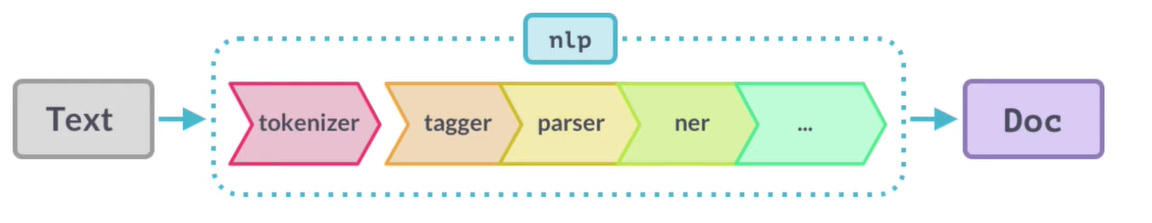

The pipeline takes a Doc, modifies it, and returns in:

In [32]:
from spacy.language import Language

@Language.component("custom_thing")
def custom_thing(doc):
    
    print("Document Length", len(doc))
    
    return doc

In [33]:
nlp.add_pipe("custom_thing", first=True) # This will be the first thing run in the pipeline

<function __main__.custom_thing(doc)>

In [34]:
print("Pipe line: ", nlp.pipe_names)

Pipe line:  ['custom_thing', 'tok2vec', 'tagger', 'parser', 'ner', 'attribute_ruler', 'lemmatizer']


In [35]:
doc = nlp("Hello World!")

Document Length 3


In [36]:
nlp.remove_pipe("custom_thing")

('custom_thing', <function __main__.custom_thing(doc)>)

## Training

You can train your own data or update existing models with new data